<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Autoencoder

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Autoencoders**. 

**YouTube Lecture**: check out my lectures on:

* [Artificial Neural Networks](https://youtu.be/A9PiCMY_6nM?si=NxWSU_5RgQ4w55EL)
* [Convolutional Neural Networks](https://youtu.be/za2my_XDoOs?si=LeHU6p2_fc9dX4Yt)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

Autoencoders are a very powerful, flexible deep learning approach for compressing information, 

* mapping training data to a latent space

* dimensionality reduction of high dimensional data to a much lower dimensionality

* nonlinear, general approach

#### Autoencoder Architecture

Here's our simple autoencoder,

<figure style="text-align: center;">
  <img src="_static/autoencoder/autoencoder.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Simple demonstration autoencoder.
</figcaption>
</figure>

This is literally the artificial neural network from the [Artificial Neural Networks](https://geostatsguy.github.io/MachineLearningDemos_Book/MachineLearning_ANN.html) mirrored. 

I do not discuss the forward pass through the network, if you are unfamiliar with this process, for example,

*  activation applied to the linear weighting plus bias in the nodes

then please review the artificial neural network chapter.

I decided to use unique numerical indices for each node for concise notation for connection weights, for example $\lambda_{1,4}$, and biases, for example, $b_4$, $I$ for input nodes, $L$ for encoder hidden layer ('left'), $M$ for latent node ('middle'), $R$ for decoder hidden layer ('right') and finally $O$ for output nodes.

The parts of the autoencoder are indicated below,

<figure style="text-align: center;">
  <img src="_static/autoencoder/autoencoderparts.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Simple demonstration autoencoder with parts labeled.
</figcaption>
</figure>

The signal passed through the autoencoder and notation include, 

* **Input** – training samples,

$$
z
$$

* **Encoder** – learned compression of the training samples to latent space,

$$
x = f_{\theta} (z)
$$

* **Latent Space** – bottleneck summarizes patterns in the training data,

$$
𝑥
$$

* **Decoder** – learned decompression of the latent space to reconstruction of the original training data,

$$
\hat{z} = g_{\phi} (x) = g_{\phi} (f_{\theta}(z) )
$$

* Reconstruction – attempt to reproduce input,

$$
\hat{z} \sim z
$$

#### Training Model Parameters

Training an autoencoder proceeds iteratively by these steps.

<figure style="text-align: center;">
  <img src="_static/ANN/training_cycle.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Training an artificial neural network proceeds iteratively by, 1. forward pass to make a prediction, 2. calculate the error derivative based on the prediction and truth over training data, 3. backpropagate the error derivative back through the artificial neural network to calculate the derivatives of the error over all the model weights and biases parameters, 4. update the model parameters based on the derivatives and learning rates, 5. repeat until convergence.
</figcaption>
</figure>

Here's some details on each step,

0. **Initializing the Model Parameters** - initialize all model parameters with typically small (near zero) random values. Here's a couple common methods,

* **Xavier Weight Initialization** - random realizations from uniform distributions specified by $U[\text{min}, \text{max}]$,

$$
\lambda_{i,j} = F_U^{-1} \left[ \frac{-1}{\sqrt{p}}, \frac{1}{\sqrt{p}} \right] (p^\ell)
$$

* where $F^{-1}_U$ is the inverse of the CDF, $p$ is the number of inputs, and $p^{\ell}$ is a random cumulative probability value drawn from the uniform distribution, $U[0,1]$.

* **Normalized Xavier Weight Initialization** - random realizations from uniform distributions specified by $U[\text{min}, \text{max}]$,

$$
\lambda_{i,j} = F_U^{-1} \left[ \frac{-1}{\sqrt{p}+k}, \frac{1}{\sqrt{p}+k} \right] (p^\ell)
$$

* where $F^{-1}_U$ is the inverse of the CDF, $p$ is the number of inputs, $k$ is the number of outputs, and $p^{\ell}$ is a random cumulative probability value drawn from the uniform distribution, $U[0,1]$.

* For example, if we return to our first hidden layer node, 

<figure style="text-align: center;">
  <img src="_static/ANN/ann_walkthrough_hidden.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> First hidden layer node with 3 inputs, and 1 output.
</figcaption>
</figure>

* we have $p = 3$ and $k = 1$, and we draw from the uniform distribution, 

$$
U \left[ \frac{-1}{\sqrt{p}+k}, \frac{1}{\sqrt{p}+k} \right] = U \left[ \frac{-1}{\sqrt{3}+1}, \frac{1}{\sqrt{3}+1} \right]
$$

1. **Forward Pass** - to pass a training sample, $z$, to calculate the reconstruction, $\hat{z}. Initial predictions will be random for the first iteration, but will improve. 

2. **Calculate the Error Derivative** - based on the miss match between the input training sample, $z$, and the reconstruction, $\hat{z}$.

3. **Backpropagate the Error Derivative** - we shift back through the artificial neural network to calculate the derivatives of the error over all the model weights and biases parameters, to accomplish this we use the chain rule,

$$
\frac{\partial}{\partial x} f(g(h(x))) = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial x}
$$

4. **Loop Over Batch and Average the Error Derivatives** - go to step 1 for all training data in the batch and then calculate the average of the error derivatives, for example,

4. **Update the Model Parameters** - based on the derivatives, \frac{\partial P}{\partial \lambda_{i,j}} and learning rates, $\eta$, like this,

$$
\lambda_{1,4}^{\ell} = \lambda_{1,4}^{\ell-1} - \eta \cdot \frac{1}{B} \sum_{i=1}^{B} \frac{\partial \mathcal{L}^{(i)}}{\partial \lambda_{1,4}}
$$

5. **Repeat Until Convergence** - return to step 1. until the error, $P$, is reduced to an acceptable level, i.e., model convergence is the condition to stop the iterations


#### Autoencoder Loss

There is a loss and loss gradient at each output-input node pair. The error loss function,


<figure style="text-align: center;">
  <img src="_static/autoencoder/error.png" style="display: block; margin: 0 auto; width: 45%;">
  <figcaption style="text-align: center;"> Autoencoder loss at each output node, the goal is for the output to match the input.
</figcaption>
</figure>

We can generalize as,

$$
L = \frac{1}{2} \sum_{i=1}^3 \left(O_{i+8} - I_i \right)^2
$$

Note, the irregular indexing is due to my choice to use a unique node index at each node.

Error derivative at each node is,

$$
\frac{\partial \mathcal{L}}{\partial O_9} = O_9 - I_1
$$

$$
\frac{\partial \mathcal{L}}{\partial O_{10}} = O_{10} - I_2
$$

$$
\frac{\partial \mathcal{L}}{\partial O_{11}} = O_{11} - I_3
$$

#### Autoencoder Backpropagation

Let’s walk through the back propagation of our autoencoder, let’s start with a bias in the output node, $\frac{\partial \mathcal{L}}{\partial b_{9}}$.

<figure style="text-align: center;">
  <img src="_static/autoencoder/backb9.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Backpropagation to the bias, \(𝑏_9\), in the hidden decoder node, \(𝑂_9\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial b_9} 
= \frac{\partial O_{9_{\mathrm{in}}}}{\partial b_9} 
\cdot \frac{\partial O_9}{\partial O_{9_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial O_9} 
= 1 \cdot 1 \cdot (O_9 - I_1)
$$

Let's explain each part. We start with the output gradient $\frac{\partial \mathcal{L}}{\partial O_9}$ and step across the output node, $O_9$, since linear activation is applied in the output nodes, 

$$
\frac{\partial O_9}{\partial O_{9_{in}}} = 1.0
$$

Now we can calculate the derivative of the bias, $b_9$, with respect to the node input,

$$
\frac{\partial 0_{9_{\mathrm{in}}}}{\partial b_9} 
= \frac{\partial}{\partial b_9} \left( \lambda_{7,9} R_7 + \lambda_{8,9} R_8 + b_9 \right) 
= 1
$$

Now we can proceed to the connection weight, 𝜆_7,9.

<figure style="text-align: center;">
  <img src="_static/autoencoder/back79.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Backpropagation to the connection weight, \(\lambda_{7,9}\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{7,9}} 
= \frac{\partial O_{9_{\mathrm{in}}}}{\partial \lambda_{7,9}} 
\cdot \frac{\partial O_9}{\partial O_{9_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial O_9} 
= R_7 \cdot 1 \cdot (O_9 - I_1)
$$

Once again, since linear activation is applied in the output nodes, 

$$
\frac{\partial O_9}{\partial O_{9_{in}}} = 1.0
$$

and $\frac{\partial O^{\text{in}}_9}{\partial \lambda_{7,9}}$ is simply the output from $𝑅_7$,

$$
\frac{\partial O^{\text{in}}_9}{\partial \lambda_{7,9}} 
= \frac{\partial}{\partial \lambda_{7,9}} \left( \lambda_{7,9} R_7 + \lambda_{8,9} R_8 + b_9 \right) 
= R_7
$$

Let’s continue past $\partial \lambda_{7,9}$ to the output from our decoder hidden node, $𝑅_7$

<figure style="text-align: center;">
  <img src="_static/autoencoder/backr7.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Backpropagation to the output of the decoder hidden layer node \(R_7\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial R_7} 
= \frac{\partial O_{9_{\mathrm{in}}}}{\partial R_7} 
\cdot \frac{\partial O_9}{\partial O_{9_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial O_9} 
+ \frac{\partial O_{10_{\mathrm{in}}}}{\partial R_7} 
\cdot \frac{\partial O_{10}}{\partial O_{10_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial O_{10}} 
+ \frac{\partial O_{11_{\mathrm{in}}}}{\partial R_7} 
\cdot \frac{\partial O_{11}}{\partial O_{11_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial O_{11}}
$$

that we can evaluate as,

$$
\frac{\partial \mathcal{L}}{\partial R_7} 
= \lambda_{7,9} \cdot 1 \cdot (O_9 - I_1) 
+ \lambda_{7,10} \cdot 1 \cdot (O_{10} - I_2) 
+ \lambda_{7,11} \cdot 1 \cdot (O_{11} - I_3)
$$

We add the derivatives from each connection.
Once again, since linear activation at $𝑂_{9}$, $𝑂_{10}$, and $𝑂_{11}$,

$$
\frac{\partial O_9}{\partial O_{9_{\mathrm{in}}}} = 1, \quad
\frac{\partial O_{10}}{\partial O_{10_{\mathrm{in}}}} = 1, \quad
\frac{\partial O_{11}}{\partial O_{11_{\mathrm{in}}}} = 1
$$

Also, along the connection, the derivative is simply the weight,

$$
\frac{\partial O_{9_{\mathrm{in}}}}{\partial R_7} = \lambda_{7,9}, \quad
\frac{\partial O_{10_{\mathrm{in}}}}{\partial R_7} = \lambda_{7,10}, \quad
\frac{\partial O_{11_{\mathrm{in}}}}{\partial R_7} = \lambda_{7,11}
$$

for example we can demonstrate this for $\frac{\partial O_{9_{\mathrm{in}}}}{\partial R_7}$ as, 

$$
\frac{\partial O_{9_{\mathrm{in}}}}{\partial R_7} 
= \frac{\partial}{\partial R_7} \left( \lambda_{7,9} R_7 + \lambda_{8,9} R_8 + b_9 \right) 
= \lambda_{7,9}
$$

Let’s continue from the output from our decoder hidden layer node, $𝑅_7$,  to calculate the derivative of the bias in the node, $b_7$. 

<figure style="text-align: center;">
  <img src="_static/autoencoder/backb7.png" style="display: block; margin: 0 auto; width: 65%;">
  <figcaption style="text-align: center;"> Backpropagation to the bias, $b_7$, in the hidden decoder node, $R_7$.
</figcaption>
</figure>

From the chain rule we get, 

$$
\frac{\partial \mathcal{L}}{\partial b_7} 
= \frac{\partial R_{7_{\mathrm{in}}}}{\partial b_7} 
\cdot \frac{\partial R_7}{\partial R_{7_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial R_7}
$$

Since sigmoid activation at $R_7$, to move across the node,

$$
\frac{\partial R_7}{\partial R_{7_{\mathrm{in}}}} 
= \sigma' (R_7) = R_7 (1 - R_7)
$$

and for the partial derivative of the node input given the bias,

$$
\frac{R_{7_{\mathrm{in}}}}{\partial b_7} 
= \frac{\partial}{\partial b_7} \left( \lambda_{6,7} M_6 + b_7 \right) 
= 1
$$

So now we have, 

$$
\frac{\partial \mathcal{L}}{\partial b_7} 
= 1 \cdot R_7 (1 - R_7) \cdot 
\overbrace{
\left[
\lambda_{7,9} \cdot 1 \cdot (O_9 - I_1) 
+ \lambda_{7,10} \cdot 1 \cdot (O_{10} - I_2) 
+ \lambda_{7,11} \cdot 1 \cdot (O_{11} - I_3)
\right]
}^{\frac{\partial L}{\partial R_7}}
$$

Now we can proceed to the connection weight, $\lambda_{6,7}$.

<figure style="text-align: center;">
  <img src="_static/autoencoder/back67.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Backpropagation to the connection weight, \(\lambda_{6,7}\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{6,7}} 
= \frac{\partial R_{7_{\mathrm{in}}}}{\partial \lambda_{6,7}} 
\cdot \frac{\partial R_7}{\partial R_{7_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial R_7}
$$

Once again, since sigmoid activation is applied in the hidden layer nodes, 

$$
\frac{\partial R_7}{\partial R_{7_{in}}} = 1.0
$$

and $\frac{\partial R_{7_{\mathrm{in}}}}{\partial \lambda_{6,7}}$ is simply the output from $M_6$,

$$
\frac{\partial R_{7_{\mathrm{in}}}}{\partial \lambda_{6,7}} 
= \frac{\partial}{\partial \lambda_{6,7}} \left( \lambda_{6,7} M_6 + b_6 \right) 
= M_6
$$

So now we have, 

$$
\frac{\partial \mathcal{L}}{\partial b_7} 
= M_6 \cdot R_7 (1 - R_7) \cdot 
\overbrace{
\left[
\lambda_{7,9} \cdot 1 \cdot (O_9 - I_1) 
+ \lambda_{7,10} \cdot 1 \cdot (O_{10} - I_2) 
+ \lambda_{7,11} \cdot 1 \cdot (O_{11} - I_3)
\right]
}^{\frac{\partial \mathcal{L}}{\partial R_7}}
$$

Let’s get continue to the output from our latent node, 𝑀_6

<figure style="text-align: center;">
  <img src="_static/autoencoder/backm6.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Backpropagation to the output of the latent node, \(M_6\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial M_6} 
= \frac{\partial R_{7_{\mathrm{in}}}}{\partial M_6} 
\cdot \frac{\partial R_7}{\partial R_{7_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial R_7} 
+ \frac{\partial R_{8_{\mathrm{in}}}}{\partial M_6} 
\cdot \frac{\partial R_8}{\partial R_{8_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial R_8}
$$

That we can resolve as, 

$$
\frac{\partial \mathcal{L}}{\partial M_6} 
= \lambda_{6,7} \cdot R_7 (1 - R_7) \cdot \frac{\partial \mathcal{L}}{\partial R_7} 
+ \lambda_{6,8} \cdot R_8 (1 - R_8) \cdot \frac{\partial \mathcal{L}}{\partial R_8}
$$

Once again, since sigmoid activation, 

$$
\frac{\partial R_7}{\partial R_{7_{\mathrm{in}}}} = R_7 (1 - R_7), \quad
\frac{\partial R_8}{\partial R_{8_{\mathrm{in}}}} = R_8 (1 - R_8)
$$

and along the connections,

$$
\begin{aligned}
\frac{\partial R_{7_{\mathrm{in}}}}{\partial M_6} 
&= \frac{\partial}{\partial M_6} \left( \lambda_{6,7} M_6 + b_7 \right) 
= \lambda_{6,7} \\
\frac{\partial R_{8_{\mathrm{in}}}}{\partial M_6} 
&= \frac{\partial}{\partial M_6} \left( \lambda_{6,8} M_6 + b_8 \right) 
= \lambda_{6,8}
\end{aligned}
$$

Let’s continue from the output from our latent node, $M_6$, to calculate the derivative of the bias in the node, $b_6$. 

<figure style="text-align: center;">
  <img src="_static/autoencoder/backb6.png" style="display: block; margin: 0 auto; width: 43%;">
  <figcaption style="text-align: center;"> Backpropagation to the bias, $b_6$, in the latent node, $M_6$. Note image shifted to make room.
</figcaption>
</figure>

From the chain rule we get, 

$$
\frac{\partial \mathcal{L}}{\partial b_6} 
= \frac{\partial M_{6_{\mathrm{in}}}}{\partial b_6} 
\cdot \frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial M_6}
$$

Since sigmoid activation at $M_6$, to move across the node,

$$
\frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} 
= \sigma' (M_6) = M_6 \cdot (1 - M_6)
$$

and for the partial derivative of the node input given the bias,

$$
\frac{\partial M_{6_{\mathrm{in}}}}{\partial b_6} 
= \frac{\partial}{\partial b_6} \left( \lambda_{4,6} L_4 + b_6 \right) 
= 1
$$

So now we have, 

$$
\frac{\partial \mathcal{L}}{\partial b_6} 
= 1 \cdot M_6 (1 - M_6) \cdot 
\overbrace{
  \left[
    \lambda_{6,7} \cdot R_7 (1 - R_7) \cdot \frac{\partial \mathcal{L}}{\partial R_7} 
    + \lambda_{6,8} \cdot R_8 (1 - R_8) \cdot \frac{\partial \mathcal{L}}{\partial R_8}
  \right]
}^{\frac{\partial \mathcal{L}}{\partial M_6}}
$$

Now we can proceed to the connection weight, $\lambda_{4,6}$.

<figure style="text-align: center;">
  <img src="_static/autoencoder/back46.png" style="display: block; margin: 0 auto; width: 43%;">
  <figcaption style="text-align: center;"> Backpropagation to the connection weight, \(\lambda_{4,6}\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{4,6}} 
= \frac{\partial M_{6_{\mathrm{in}}}}{\partial \lambda_{4,6}} 
\cdot \frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial M_6}
$$

Once again, since sigmoid activation is applied in the hidden layer nodes, 

$$
\frac{\partial M_6}{\partial M_{6_{in}}} = M_6 \cdot (1 - M_6)
$$

and $\frac{\partial M_{6_{\mathrm{in}}}}{\partial \lambda_{4,6}}$ is simply the output from $L_4$,

$$
\frac{\partial M_{6_{\mathrm{in}}}}{\partial \lambda_{4,6}} 
= \frac{\partial}{\partial \lambda_{4,6}} \left( \lambda_{4,6} L_4 + \lambda_{5,6} L_5 + b_6 \right) 
= L_4
$$

So now we have, 

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{4,6}} 
= L_4 \cdot M_6 (1 - M_6) \cdot
\overbrace{
\left[
\lambda_{6,7} \cdot R_7 (1 - R_7) \cdot \frac{\partial \mathcal{L}}{\partial R_7}
+ \lambda_{6,8} \cdot R_8 (1 - R_8) \cdot \frac{\partial \mathcal{L}}{\partial R_8}
\right]
}^{\frac{\partial \mathcal{L}}{\partial M_6}}
$$

Now we can proceed to the output of our encoder hidden layer node, $L_4$.

<figure style="text-align: center;">
  <img src="_static/autoencoder/backl4.png" style="display: block; margin: 0 auto; width: 67%;">
  <figcaption style="text-align: center;"> Backpropagation to the output of the encoder hidden node, \(𝐿_4\).
</figcaption>
</figure>

By the chain rule we get this and evaluate it as,

$$
\frac{\partial \mathcal{L}}{\partial L_4} 
= \frac{\partial M_{6_{\mathrm{in}}}}{\partial L_4} 
\cdot \frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial M_6} 
= \lambda_{4,6} \cdot M_6 (1 - M_6) \cdot \frac{\partial \mathcal{L}}{\partial M_6}
$$

Once again, since sigmoid activation is applied in the latent node, 

$$
\frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} = M_6 (1 - M_6)
$$

and $\frac{\partial M_{6_{\mathrm{in}}}}{\partial L_4}$ is simply the weight, $\lambda_{4,6}$,

$$
\frac{\partial M_{6_{\mathrm{in}}}}{\partial L_4} 
= \frac{\partial}{\partial L_4} \left( \lambda_{4,6} L_4 + b_6 \right) 
= \lambda_{4,6}
$$

Let’s continue from the output from our encoder hidden layer node, $L_4$, to calculate the derivative of the bias in the node, $b_4$. 

<figure style="text-align: center;">
  <img src="_static/autoencoder/backb4.png" style="display: block; margin: 0 auto; width: 67%;">
  <figcaption style="text-align: center;"> Backpropagation to the bias, $b_4$, in the encoder hidden layer node, $L_4$.
</figcaption>
</figure>

From the chain rule we get, 

$$
\frac{\partial \mathcal{L}}{\partial b_4} 
= \frac{\partial L_{4_{\mathrm{in}}}}{\partial b_4} 
\cdot \frac{\partial L_4}{\partial L_{4_{\mathrm{in}}}} 
\cdot \frac{\partial \mathcal{L}}{\partial L_4} 
= 1 \cdot L_4 (1 - L_4) \cdot \frac{\partial \mathcal{L}}{\partial L_4}
$$

Since sigmoid activation at $M_6$, to move across the node,

$$
\frac{\partial M_6}{\partial M_{6_{\mathrm{in}}}} 
= \sigma' (M_6) = M_6 \cdot (1 - M_6)
$$

and for the partial derivative of the node input given the bias,

$$
\frac{\partial M_{6_{\mathrm{in}}}}{\partial b_6} 
= \frac{\partial}{\partial b_6} \left( \lambda_{4,6} L_4 + b_6 \right) 
= 1
$$

So now we have, 

$$
\frac{\partial \mathcal{L}}{\partial b_6} 
= 1 \cdot M_6 (1 - M_6) \cdot 
\overbrace{
  \left[
    \lambda_{6,7} \cdot R_7 (1 - R_7) \cdot \frac{\partial \mathcal{L}}{\partial R_7} 
    + \lambda_{6,8} \cdot R_8 (1 - R_8) \cdot \frac{\partial \mathcal{L}}{\partial R_8}
  \right]
}^{\frac{\partial \mathcal{L}}{\partial M_6}}
$$

And, finally we proceed to the connection weight, $\lambda_{1,4}$.

<figure style="text-align: center;">
  <img src="_static/autoencoder/back14.png" style="display: block; margin: 0 auto; width: 67%;">
  <figcaption style="text-align: center;"> Backpropagation to the connection weight, \(\lambda_{1,4}\).
</figcaption>
</figure>

By the chain rule we get,

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{1,4}} 
= \frac{\partial L^{\text{in}}_4}{\partial \lambda_{1,4}} 
\cdot \frac{\partial L_4}{\partial L^{\text{in}}_4} 
\cdot \frac{\partial \mathcal{L}}{\partial L_4}
$$

Once again, since sigmoid activation is applied in the hidden layer nodes, 

$$
\frac{\partial L_4}{\partial L_{4_{in}}} = L_4 \cdot (1 - L_4)
$$

and $\frac{\partial L^{\text{in}}_4}{\partial \lambda_{1,4}}$ is simply the output from $I_1$,

$$
\frac{\partial L^{\text{in}}_4}{\partial \lambda_{1,4}} 
= \frac{\partial}{\partial \lambda_{1,4}} \left( \lambda_{1,4} I_1 + \lambda_{2,4} I_2 + \lambda_{3,4} I_3 + b_4 \right) 
= I_1
$$

So now we have, 

$$
\frac{\partial L}{\partial \lambda_{1,4}} 
= I_1 \cdot L_4 (1 - L_4) \cdot \underbrace{\left[ \lambda_{4,6} \cdot M_6 (1 - M_6) \cdot \frac{\partial L}{\partial M_6} \right]}_{\frac{\partial L}{\partial L_4}}
$$

Now we will build out this autoencoder from the ground up with only the NumPy python package for arrays and Python built-in data structure dictionaries. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [84]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # set axes and grids in the background for all plots
from scipy.stats import rankdata                              # to assist with plot label placement
from sklearn.linear_model import LinearRegression             # fit the relationship between latent and training data slope               
seed = 13                                                     # random number seed
cmap = plt.cm.tab20                                           # default colormap
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Here's the functions to train and visualize our autoencoder.

In [87]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

def xavier(n_in, n_out):                                      # Xavier initializer function
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit)

def sigmoid(x):                                               # sigmoid activation
    return 1 / (1 + np.exp(-x))

def initialize_parameters():                                  # initialize all weights and biases and build dictionaries of both
    weights = {                            
        'w14': xavier(3, 2),
        'w24': xavier(3, 2),
        'w34': xavier(3, 2),
        'w15': xavier(3, 2),
        'w25': xavier(3, 2),
        'w35': xavier(3, 2),
        'w46': xavier(2, 1),
        'w56': xavier(2, 1),
        'w67': xavier(1, 2),
        'w68': xavier(1, 2),
        'w79': xavier(2, 3),
        'w89': xavier(2, 3),
        'w710': xavier(2, 3),
        'w810': xavier(2, 3),
        'w711': xavier(2, 3),
        'w811': xavier(2, 3),
    }
    biases = {                                                # biases (one per neuron, excluding input)
        'b4': 0.0,
        'b5': 0.0,
        'b6': 0.0,
        'b7': 0.0,
        'b8': 0.0,
        'b9': 0.0,
        'b10': 0.0,
        'b11': 0.0
    }
    return weights, biases 

def forward_pass(input_vec, weights, biases):                 # forward pass of the autoencoder
    I1, I2, I3 = input_vec.flatten()                               # input nodes (I1, I2, I3)
    z4 = weights['w14'] * I1 + weights['w24'] * I2 + weights['w34'] * I3 + biases['b4'] # encoder
    a4 = sigmoid(z4)

    z5 = weights['w15'] * I1 + weights['w25'] * I2 + weights['w35'] * I3 + biases['b5']
    a5 = sigmoid(z5)

    z6 = weights['w46'] * a4 + weights['w56'] * a5 + biases['b6'] # bottlekneck
    a6 = sigmoid(z6)

    z7 = weights['w67'] * a6 + biases['b7']                   # decoder
    a7 = sigmoid(z7)

    z8 = weights['w68'] * a6 + biases['b8']
    a8 = sigmoid(z8)

    z9 = weights['w79'] * a7 + weights['w89'] * a8 + biases['b9']
    a9 = z9  

    z10 = weights['w710'] * a7 + weights['w810'] * a8 + biases['b10']
    a10 = z10  # linear

    z11 = weights['w711'] * a7 + weights['w811'] * a8 + biases['b11']
    a11 = z11  # linear

    return {                                                  # return all activations as a dictionary
        'I1': I1, 'I2': I2, 'I3': I3,
        'L4': a4, 'L5': a5,
        'M6': a6,
        'R7': a7, 'R8': a8,
        'O9': a9, 'O10': a10, 'O11': a11
    }

def mse_loss_and_derivative(output_vec, input_vec):           # MSE loss and error derivative given output and input
    diff = output_vec - input_vec
    loss = np.mean(diff**2)
    dloss_dout = (2/3) * diff  # shape (3,1)
    return loss, dloss_dout

def sigmoid_derivative(x):                                    # derivative of sigmoid activation
    return x * (1 - x)

def backpropagate(activations, weights, biases, dloss_dout):  # backpropagate the error derivatives
    I1, I2, I3 = activations['I1'], activations['I2'], activations['I3']
    a4, a5 = activations['L4'], activations['L5']
    a6 = activations['M6']
    a7, a8 = activations['R7'], activations['R8']
    O9, O10, O11 = activations['O9'], activations['O10'], activations['O11']

    delta9 = dloss_dout[0, 0]                                 # error terms (delta) for output nodes = dLoss/dOutput
    delta10 = dloss_dout[1, 0]
    delta11 = dloss_dout[2, 0]

    grad_weights = {}                                         # gradients for weights from R7, R8 to O9, O10, O11
    grad_biases = {}

    grad_weights['w79'] = delta9 * a7
    grad_weights['w89'] = delta9 * a8
    grad_weights['w710'] = delta10 * a7
    grad_weights['w810'] = delta10 * a8
    grad_weights['w711'] = delta11 * a7
    grad_weights['w811'] = delta11 * a8

    grad_biases['b9'] = delta9
    grad_biases['b10'] = delta10
    grad_biases['b11'] = delta11

    delta_r7 = (delta9 * weights['w79'] + delta10 * weights['w710'] + delta11 * weights['w711']) * sigmoid_derivative(a7) # gradients for R7 and R8
    delta_r8 = (delta9 * weights['w89'] + delta10 * weights['w810'] + delta11 * weights['w811']) * sigmoid_derivative(a8)

    grad_weights['w67'] = delta_r7 * a6                       # gradients for weights from M6 to R7, R8
    grad_weights['w68'] = delta_r8 * a6

    grad_biases['b7'] = delta_r7
    grad_biases['b8'] = delta_r8

    delta_m6 = (delta_r7 * weights['w67'] + delta_r8 * weights['w68']) * sigmoid_derivative(a6) # backpropagate delta to M6 (sigmoid)

    grad_weights['w46'] = delta_m6 * a4                       # gradients for weights from L4, L5 to M6
    grad_weights['w56'] = delta_m6 * a5

    grad_biases['b6'] = delta_m6

    delta_l4 = delta_m6 * weights['w46'] * sigmoid_derivative(a4) # backpropagate delta to L4, L5 (sigmoid)
    delta_l5 = delta_m6 * weights['w56'] * sigmoid_derivative(a5)

    grad_weights['w14'] = delta_l4 * I1                       # gradients for weights from I1, I2, I3 to L4
    grad_weights['w24'] = delta_l4 * I2
    grad_weights['w34'] = delta_l4 * I3

    grad_biases['b4'] = delta_l4

    grad_weights['w15'] = delta_l5 * I1                       # gradients for weights from I1, I2, I3 to L5
    grad_weights['w25'] = delta_l5 * I2
    grad_weights['w35'] = delta_l5 * I3

    grad_biases['b5'] = delta_l5
    return grad_weights, grad_biases

def update_parameters(weights, biases, grad_weights, grad_biases, learning_rate): # update the weights and biased by derivatives and learning rate
    for key in grad_weights:                                  # update weights
        weights[key] -= learning_rate * grad_weights[key]
    for key in grad_biases:                                   # update biases
        biases[key] -= learning_rate * grad_biases[key]
    return weights, biases

#### Visualize the Autoencoder Network

Here we specify the autoencoder labels, positions, connections and colors and then plot the autoencoder.

* while this code is general, the actual autoencoder codes are not generalized to work with other architectures, for example changing the depth or width of the network

* change the display parameters but do not the autoencoder architecture

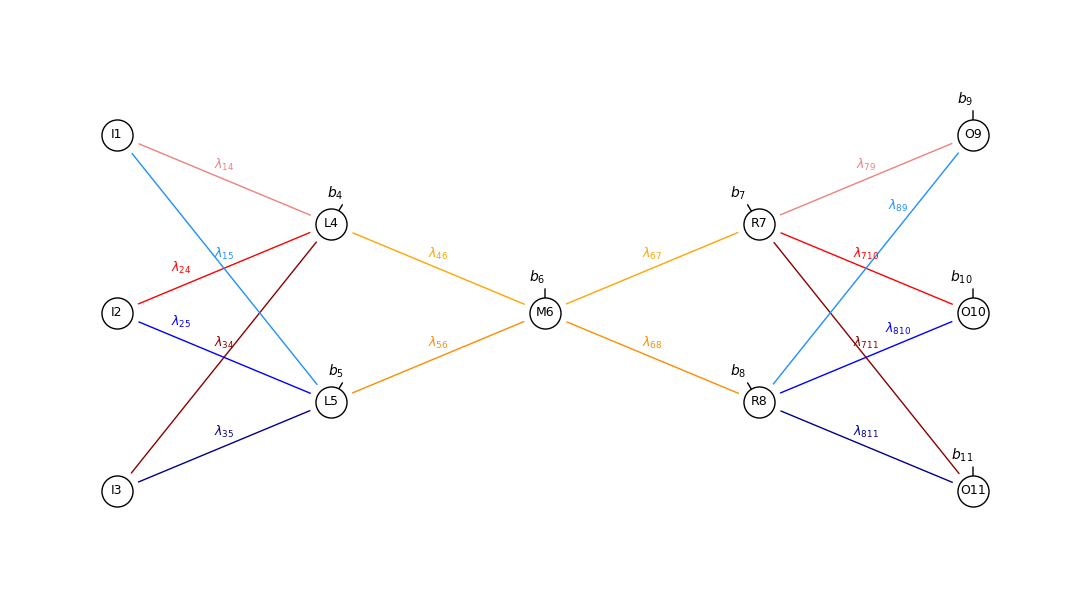

In [90]:
positions = {                                                 # node positions
    'I1': (0, 2), 'I2': (0, 1), 'I3': (0, 0),
    'L4': (1, 1.5), 'L5': (1, 0.5),
    'M6': (2, 1),
    'R7': (3, 1.5), 'R8': (3, 0.5),
    'O9': (4, 2), 'O10': (4, 1), 'O11': (4, 0),
}

node_colors = {                                               # node colors
    'I1': 'white', 'I2': 'white', 'I3': 'white',
    'L4': 'white', 'L5': 'white',
    'M6': 'white',
    'R7': 'white', 'R8': 'white',
    'O9': 'white', 'O10': 'white', 'O11': 'white',
}

edges = [                                                     # edges and weight labels
    ('I1', 'L4', 'lightcoral'), ('I2', 'L4', 'red'), ('I3', 'L4', 'darkred'),
    ('I1', 'L5', 'dodgerblue'), ('I2', 'L5', 'blue'), ('I3', 'L5', 'darkblue'),
    ('L4', 'M6', 'orange'), ('L5', 'M6', 'darkorange'),
    ('M6', 'R7', 'orange'), ('M6', 'R8', 'darkorange'),
    ('R7', 'O9', 'lightcoral'), ('R7', 'O10', 'red'), ('R7', 'O11', 'darkred'),
    ('R8', 'O9', 'dodgerblue'), ('R8', 'O10', 'blue'), ('R8', 'O11', 'darkblue'),
]

weight_labels = { (src, dst,): f"$\\lambda_{{{src[1]}{dst[1:]}}}$" for (src, dst, color) in edges }

bias_offsets = {                                              # bias vector offsets
    'L4': (0.06, 0.12), 'L5': (0.06, 0.12),
    'M6': (0.0, 0.15),
    'R7': (-0.06, 0.12), 'R8': (-0.06, 0.12),
    'O9': (0.0, 0.15), 'O10': (0.0, 0.15), 'O11': (0.0, 0.15),
}

bias_labels = { node: f"$b_{{{node[1:]}}}$" for node in bias_offsets.keys() }
# Plot
fig, ax = plt.subplots(figsize=(11, 6))

custom_weight_offsets = {                                     # custom label offsets for select overlapping weights
    ('I2', 'L4'): (-0.20, 0.0),
    ('I2', 'L5'): (-0.2, 0.20),
    ('R8', 'O9'): (0.15, 0.35),
    ('R8', 'O10'): (0.15, 0.16),
}

for (src, dst, color) in edges:                               # plot edges and weight labels
    x0, y0 = positions[src]
    x1, y1 = positions[dst]
    ax.plot([x0, x1], [y0, y1], color=color, linewidth=1, zorder=1)
    xm, ym = (x0 + x1) / 2, (y0 + y1) / 2
    dx, dy = custom_weight_offsets.get((src, dst), (0, 0.08))
    ax.text(xm + dx, ym + dy, weight_labels[(src, dst)],
            fontsize=9, ha='center', va='center', color = color, zorder=5)

for node, (x, y) in positions.items():                        # white back circles
    ax.scatter(x, y, s=1000, color='white', zorder=2)

for node, (x, y) in positions.items():                        # node circles and labels
    ax.scatter(x, y, s=500, color=node_colors[node], edgecolors='black', zorder=3)
    ax.text(x, y, node, ha='center', va='center', fontsize=9, zorder=4)

for node, (dx, dy) in bias_offsets.items():                   # bias arrows and tighter label placement
    nx, ny = positions[node]
    bx, by = nx + dx, ny + dy
    ax.annotate("", xy=(nx, ny), xytext=(bx, by),
                arrowprops=dict(arrowstyle="->", color='black'), zorder=2)
    ax.text(bx, by, bias_labels[node], ha='right', va='bottom', fontsize=10)

# Final formatting
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 2.7)
ax.axis('off'); plt.tight_layout(); plt.show()

#### Make an Interesting Synthetic Dataset

Generate a stochastic dataset of 1D length of 3 vectors with a pattern that can be summarized by our autoencoder.

* if we generate random 1D vectors of length 3 our autoencoder would not be able to summarize, i.e., it is not possible to compress the information from the original 3 values

* we must include a pattern that can be learned by the autoencoder to observe dimensionality reduction through the latent node with good data reconstruction

To do this, I have calculate dataset as a hybrid model, linear + small random residual. The data generation steps include, 

1. draw a random slope $\sim N\left[-2.0, 2.0 \right]$
2. calculate 3 points at locations $\left[-1, 0, 1 \right]$, $f(\left[-1, 0, 1 \right])$
3. add random, independent residual to each location, $f(\left[-1, 0, 1 \right]) + N\left[0.0,\sigma \right]$, where sigma is the residual standard deviation

Note, the slope is retained as a label that will be compared to the latent node, $M_6$ output to check, what has our autoencoder has learned?

* our hypothesis is that the autoencoder will learn a value that directly maps to slope to describe this dataset.

* note, while this label is used to demonstrate the ability of the autoencoder to learn, it is not used to train the model!

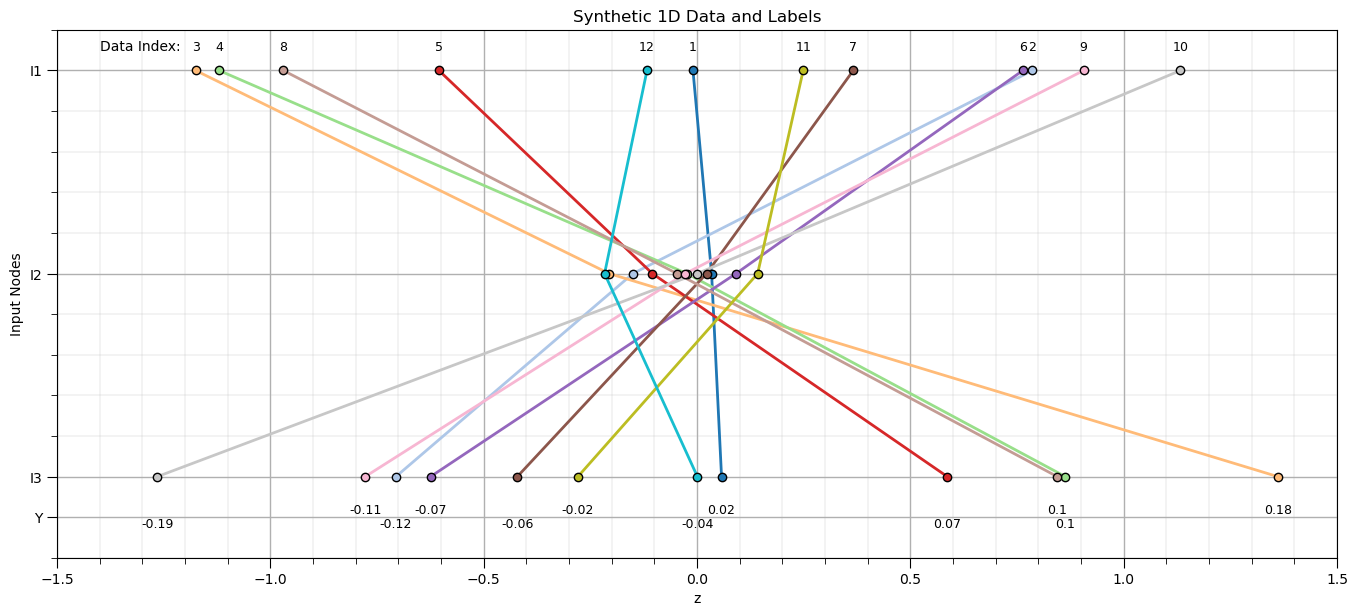

In [93]:
np.random.seed(seed = seed+1)                                 # set random seed
nbatch = 12; nnodes = 3; sigma = 0.1                          # set number of data (total number of data), number of nodes (must be 3), error st.dev.
ymat = np.zeros(nbatch); x = np.arange(1,nnodes+1,1); Xmat = np.zeros([nbatch,nnodes])
data = []
for ibatch in range(0,nbatch):                                # loop over synthetic data
    m = np.random.uniform(low = -2.0, high = 2.0)
    Xmat[ibatch] = (x-2.0)*m + np.random.normal(loc = 0.0, scale=sigma,size=nnodes)
    ymat[ibatch] = np.dot(x, Xmat[ibatch]) / np.dot(x, x)
    data.append(Xmat[ibatch].reshape(3,1))

rank = rankdata(Xmat[:,-1])                                   # rank data to improve (alternate) adjacent labels' locations
plt.subplot(111)                                              # plot the synthetic data
for ibatch in range(0,nbatch):                                
    plt.scatter(Xmat[ibatch],x,color=cmap(ibatch/(nbatch)),edgecolor='black',lw=1,zorder=10)
    plt.plot(Xmat[ibatch],x,color=cmap(ibatch/(nbatch)),lw=2,zorder=1)
    custom_positions = [1,2,3,3.2]
    custom_labels = ['I1','I2','I3','Y']
    if rank[ibatch] % 2 == 0:
        plt.annotate(np.round(ymat[ibatch],2),[Xmat[ibatch][-1],3.18],size=9,color='black',ha='center')
    else:
        plt.annotate(np.round(ymat[ibatch],2),[Xmat[ibatch][-1],3.25],size=9,color='black',ha='center') 
    plt.annotate(ibatch+1,[Xmat[ibatch][0],0.9],size=9,color='black',ha='center')
    plt.gca().set_yticks(custom_positions); plt.gca().set_yticklabels(custom_labels)
    plt.ylim([3.4,0.8]); plt.xlim([-1.5,1.5]); plt.ylabel('Input Nodes'); plt.xlabel('z'); add_grid(); plt.title('Synthetic 1D Data and Labels')
plt.annotate('Data Index: ',[-1.4,0.9])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Train the Autoencoder

We have previously defined all the basic functions for our autoencoder so we can put together our autoencoder training steps with the following functions,

1. **initialize_parameters** - initialize the weights and bias

2. **forward_pass** - forward pass through our autoencoder to calculate node outputs and data reconstruction

3. **mse_loss_and_derivative** - calculate the L2 loss and associated error derivative for each output node from training data and reconstruction

4. **backpropagate** - backpropagate the error derivative through the network based on error derivative and node outputs and then average the gradients at each weight and bias over the batch

5. **update_parameters** - update the weights and biases with the average gradient over the batch and the learning rate

6. go to 2 until convergence, in the case a set number of training epochs

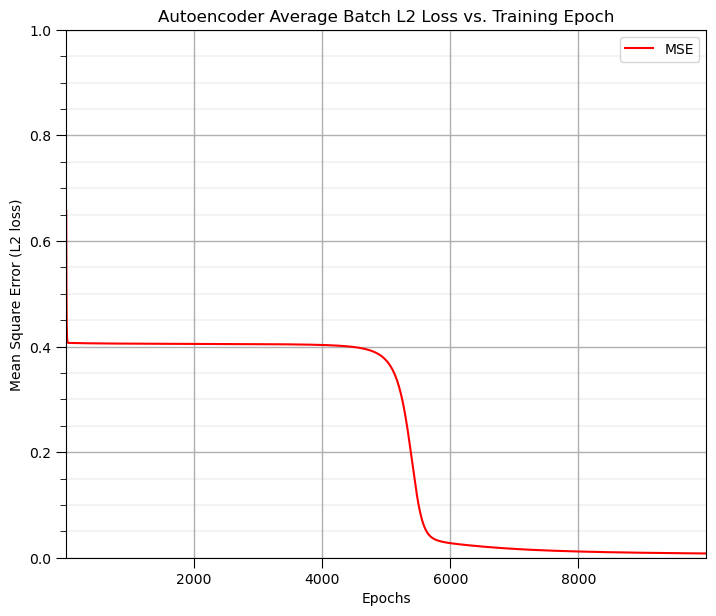

In [96]:
epochs = 10000                                                # set hyperparameters
batch_size = nbatch
learning_rate = 0.1
seed = 13
np.random.seed(seed=seed)

output_mat = np.zeros((batch_size,epochs,3)); loss_mat = np.zeros((epochs)); M6_mat = np.zeros((batch_size,epochs))

weights, biases = initialize_parameters()                     # initialize weights and biases

for epoch in range(epochs):
    sum_grad_w = {k: 0 for k in weights.keys()}               # initialize zero dictionary to average backpropogated gradients
    sum_grad_b = {k: 0 for k in biases.keys()}
    epoch_loss = 0
    for idata,input_vec in enumerate(data):
        activations = forward_pass(input_vec, weights, biases) # forward pass
        M6_mat[idata,epoch] = activations['M6']
        output_vec = np.array([[activations['O9']], [activations['O10']], [activations['O11']]])
        output_mat[idata,epoch,:] = output_vec.reshape(3)
        loss, dloss_dout = mse_loss_and_derivative(output_vec, input_vec) # compute loss and derivative
        epoch_loss += loss
        grad_w, grad_b = backpropagate(activations, weights, biases, dloss_dout) # backpropagation the derivative
        for k in grad_w:                                      # accumulate gradients
            sum_grad_w[k] += grad_w[k]
        for k in grad_b:
            sum_grad_b[k] += grad_b[k]
    avg_grad_w = {k: v / batch_size for k, v in sum_grad_w.items()} # average gradients over batch
    avg_grad_b = {k: v / batch_size for k, v in sum_grad_b.items()}
    epoch_loss /= batch_size
    loss_mat[epoch] = epoch_loss
    weights, biases = update_parameters(weights, biases, avg_grad_w, avg_grad_b, learning_rate) # update parameters
    # if epoch % 500 == 0:                                    # print loss every 100 training epochs
    #     print(f"Epoch {epoch}, Loss: {epoch_loss:.6f}")

plt.subplot(111)                                              # plot training error vs. training epoch
plt.plot(np.arange(0,epoch+1,1),loss_mat,color='red',label=r'MSE'); plt.xlim([1,epoch]); plt.ylim([0,1])
plt.xlabel('Epochs'); plt.ylabel(r'Mean Square Error (L2 loss)'); plt.title('Autoencoder Average Batch L2 Loss vs. Training Epoch')
add_grid(); plt.legend(loc='upper right'); plt.xscale('linear')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

The average L2 loss vs. training epoch curve looks very good. 

* we are seeing a pause in learning and then suddenly a fast reduction in training error and then slow convergence

* I stopped at 10,000 epochs for efficiency 


#### Evaluating Our Autoencoder Network

Let's look at the output from the latent node at the network bottleneck, i.e., the output of node M6.

* notice above that we recorded the M6 output (called node activation) for all training epochs and for all data.

* let's look at the final trained network, the last epoch, and loop over all data

Here's a plot of final epoch M6 output vs. the sample slopes, 

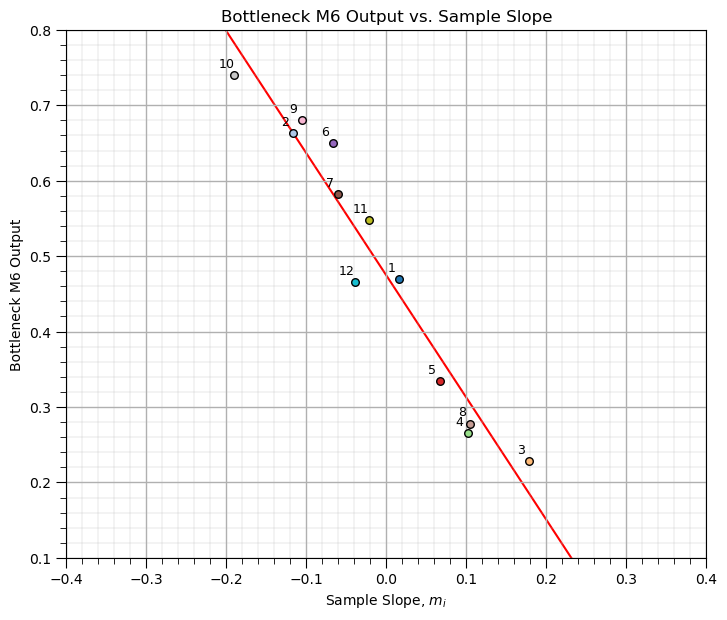

In [98]:
linear_model = LinearRegression().fit(ymat.reshape(-1, 1), M6_mat[:,-1]) # fit linear model to regress latent on training data slope

plt.subplot(111)                                              # plot latent vs. training data slope
plt.plot(np.linspace(-0.4,0.4,100),linear_model.predict(np.linspace(-0.4,0.4,100).reshape(-1,1)),color='red',zorder=-1)
for ibatch,input_vec in enumerate(data):                      # plot and label training data
    plt.scatter(ymat[ibatch],M6_mat[ibatch,-1],color=cmap(ibatch/(nbatch)),edgecolor='black',marker='o',s=30,zorder=10)
    plt.annotate(ibatch+1,[ymat[ibatch]-0.01,M6_mat[ibatch,-1]+0.01],size=9,color='black',ha='center',zorder=100) 
plt.ylabel('Bottleneck M6 Output'); plt.xlabel(r'Sample Slope, $m_i$'); plt.title('Bottleneck M6 Output vs. Sample Slope')
plt.ylim([0.1,0.8]); plt.xlim([-0.4,0.4]); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

As hypothesized, there is a good relationship between the output of our latent node at the network bottleneck and the slope of the samples used to generate the data!

* our autoencoder has learned 1 value to represent the vectors of 3 values in the dataset! 

* this is a great demonstration of information compression, 3:1!

#### Check Training Data Reconstruction

Let's visualize the reconstructed 1D data, encoded and then decoded with out autoencoder network.

* for all training data, I include the original data and the reconstructed data, i.e., data encoded and decoded by our trained autoencoder

* for each data training sample, I include the sample slope for interest, but this label are not used in the in the training, nor with the encoder or decoder 

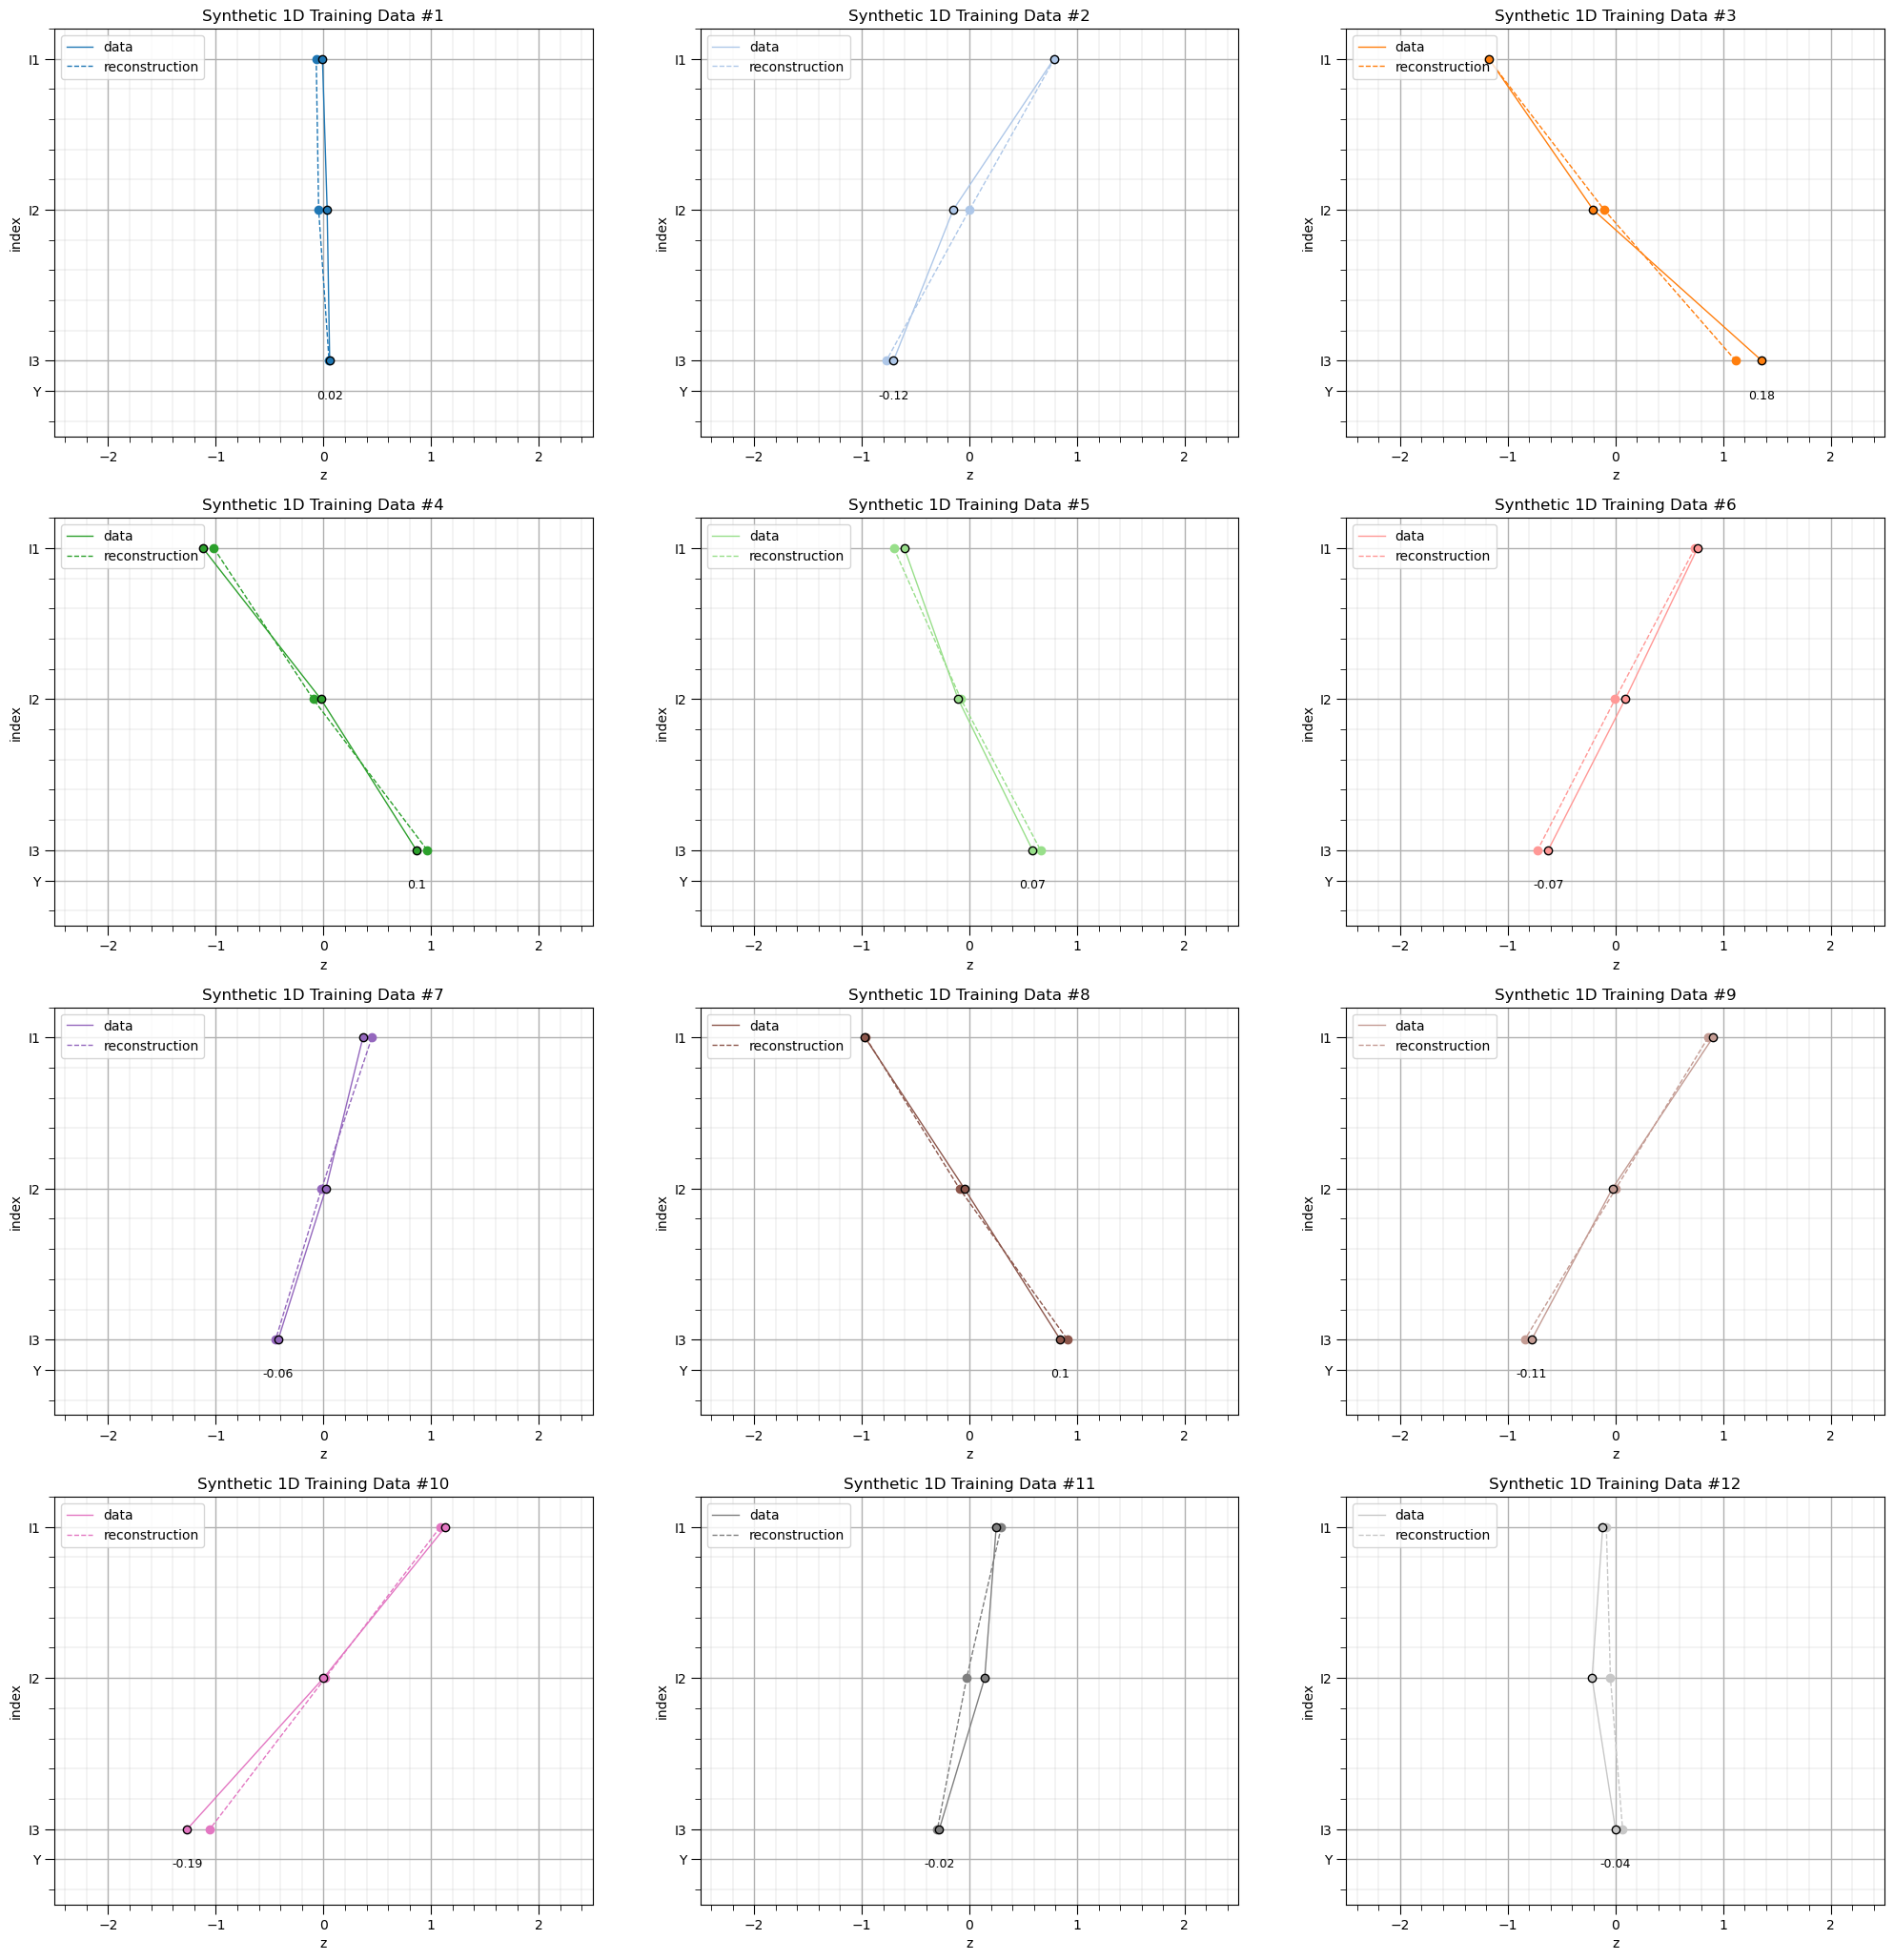

In [100]:
for idata,input_vec in enumerate(data):                       # plot training data and reconstructions             
    plt.subplot(4,3,idata+1)
    plt.scatter(Xmat[idata],x,color=cmap(idata/(nbatch+2)),edgecolor='black',lw=1,zorder=10)
    plt.plot(Xmat[idata],x,lw=1,zorder=1,color=cmap(idata/(nbatch+2)),label='data')
    custom_positions = [1,2,3,3.2]
    custom_labels = ['I1','I2','I3','Y']
    plt.annotate(np.round(ymat[idata],2),[Xmat[idata][-1],3.25],size=9,color='black',ha='center')  
    plt.scatter(output_mat[idata,-1,:],x,lw=1,color=cmap(idata/(nbatch+2)))
    plt.plot(output_mat[idata,-1,:],x,lw=1,ls='--',color=cmap(idata/(nbatch+2)),label='reconstruction')
    plt.legend(loc='upper left')
    plt.gca().set_yticks(custom_positions); plt.gca().set_yticklabels(custom_labels)
    plt.ylim([3.5,0.8]); plt.xlim([-2.5,2.5]); plt.ylabel('index'); plt.xlabel('z'); add_grid(); plt.title('Synthetic 1D Training Data #' + str(idata+1))

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=4.1, wspace=0.2, hspace=0.2); plt.show()

The training data reconstruction is quite good!

* our autoencoder has learned to encode and decode the training data

* demonstrating good dimensionality reduction from 3 to 1!

#### Check Testing Data Reconstruction

Let's generate additional data and test the reconstruction.

* check the performance of our training autoencoder with data not used to train the autoencoder, known as model generalization

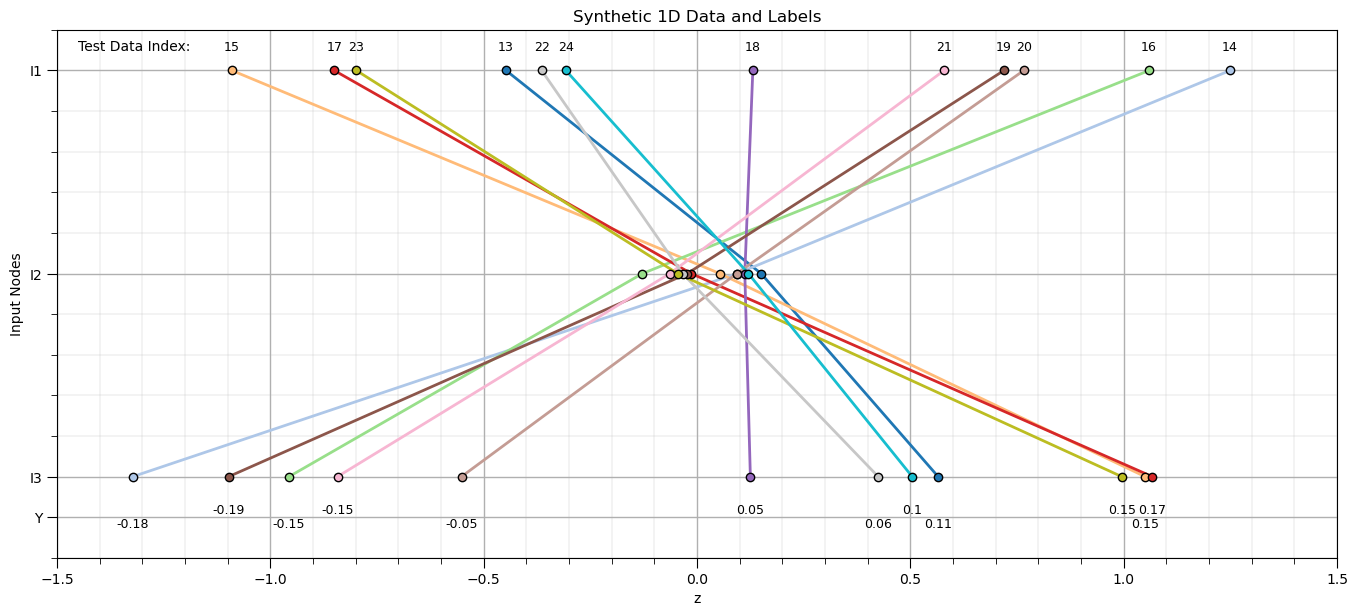

In [126]:
np.random.seed(seed = seed+7)
nbatch_test = 12; nnodes = 3; sigma = 0.1
ymat_test = np.zeros(nbatch); x = np.arange(1,nnodes+1,1); Xmat_test = np.zeros([nbatch,nnodes])
data_test = []
for ibatch in range(0,nbatch):
    m = np.random.uniform(low = -2.0, high = 2.0)
    Xmat_test[ibatch] = (x-2.0)*m + np.random.normal(loc = 0.0, scale=sigma,size=nnodes)
    ymat_test[ibatch] = np.dot(x, Xmat_test[ibatch]) / np.dot(x, x)
    data_test.append(Xmat_test[ibatch].reshape(3,1))

rank = rankdata(Xmat_test[:,-1])
plt.subplot(111)
for ibatch in range(0,nbatch_test):
    plt.scatter(Xmat_test[ibatch],x,color=cmap(ibatch/(nbatch)),edgecolor='black',lw=1,zorder=10)
    plt.plot(Xmat_test[ibatch],x,color=cmap(ibatch/(nbatch)),lw=2,zorder=1)
    custom_positions = [1,2,3,3.2]
    custom_labels = ['I1','I2','I3','Y']
    if rank[ibatch] % 2 == 0:
        plt.annotate(np.round(ymat_test[ibatch],2),[Xmat_test[ibatch][-1],3.18],size=9,color='black',ha='center')
    else:
        plt.annotate(np.round(ymat_test[ibatch],2),[Xmat_test[ibatch][-1],3.25],size=9,color='black',ha='center') 
    plt.annotate(ibatch+13,[Xmat_test[ibatch][0],0.9],size=9,color='black',ha='center')
    plt.gca().set_yticks(custom_positions); plt.gca().set_yticklabels(custom_labels)
    plt.ylim([3.4,0.8]); plt.xlim([-1.5,1.5]); plt.ylabel('Input Nodes'); plt.xlabel('z'); add_grid(); plt.title('Synthetic 1D Data and Labels')
plt.annotate('Test Data Index: ',[-1.45,0.9])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

Apply trained autoencoder to reconstruct test data.

In [104]:
output_vec_test = np.zeros((len(data_test),3))
for idata_test,input_vec_test in enumerate(data_test):
    activations = forward_pass(input_vec_test, weights, biases)                                                    # forward pass
    output_vec_test[idata_test,:] = np.array([[activations['O9']], [activations['O10']], [activations['O11']]]).reshape(-1)

Now visualizated the test data reconstructions,

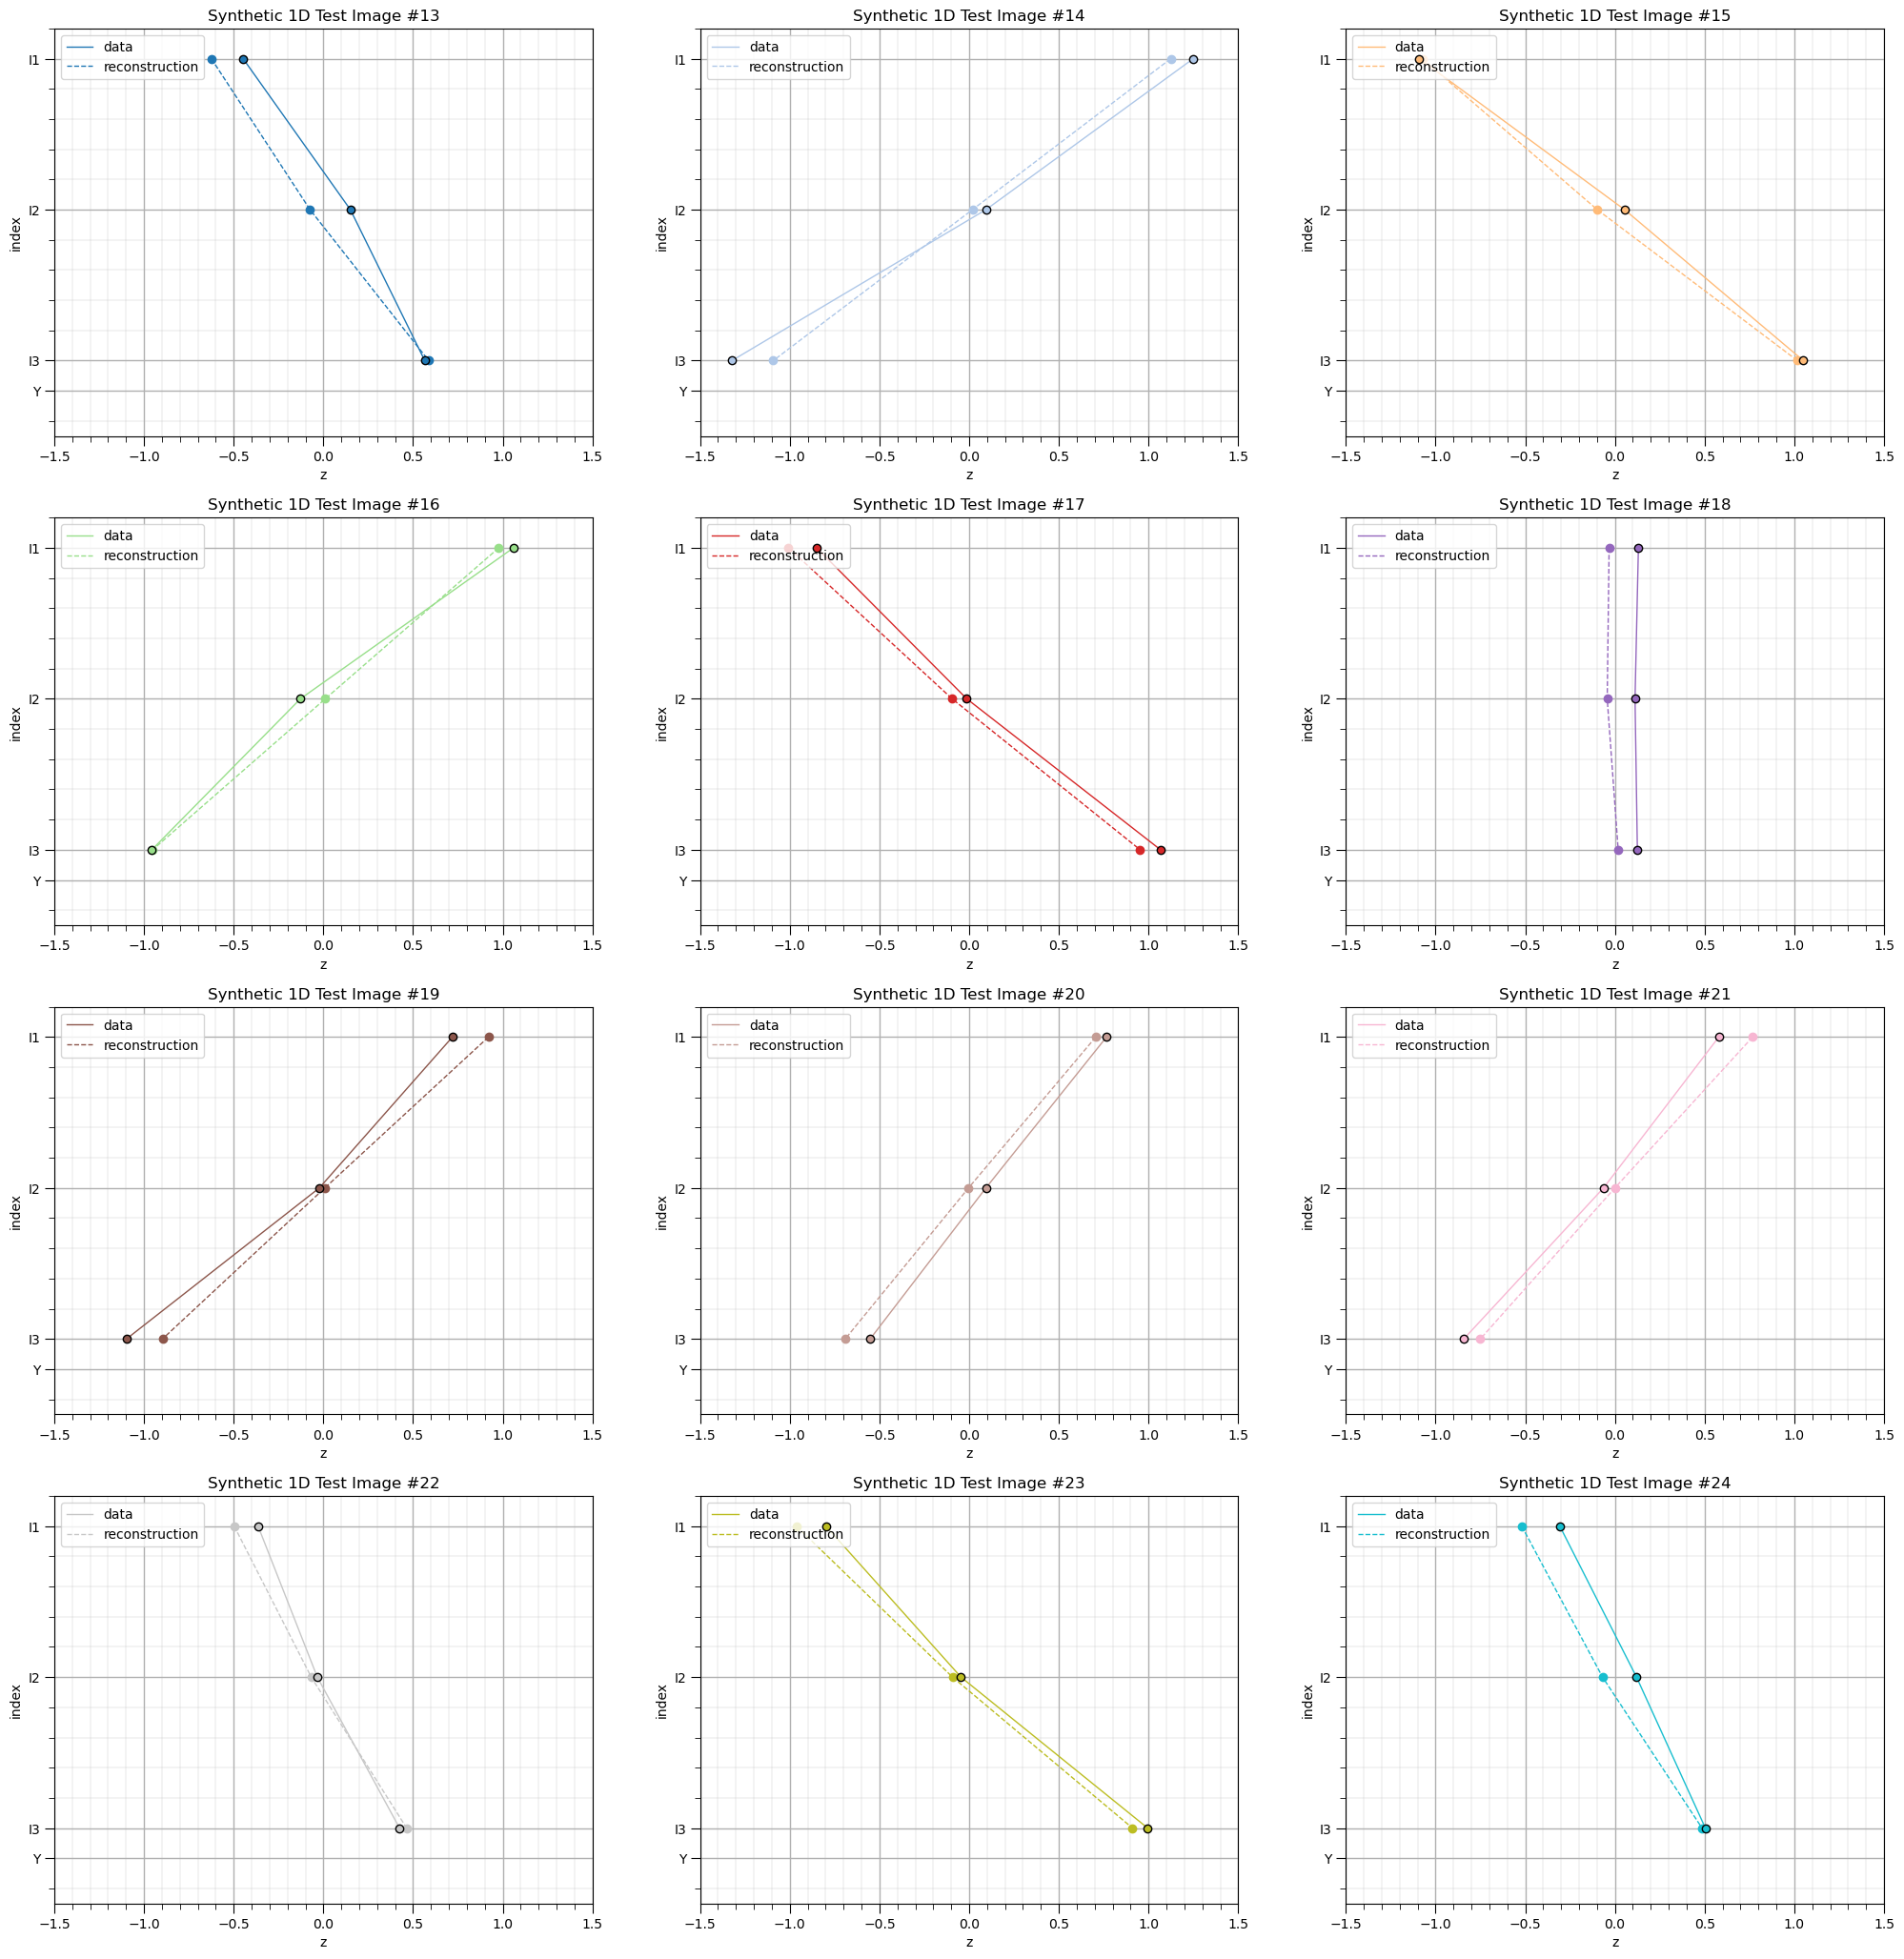

In [132]:
for idata,input_vec_test in enumerate(data_test):
    plt.subplot(4,3,idata+1)
    plt.scatter(input_vec_test,x,color=cmap(idata/(nbatch)),edgecolor='black',lw=1,zorder=10)
    plt.plot(input_vec_test,x,lw=1,zorder=1,color=cmap(idata/(nbatch)),label='data')
    custom_positions = [1,2,3,3.2]
    custom_labels = ['I1','I2','I3','Y']
    # plt.annotate(np.round(ymat[idata],2),[Xmat[idata][-1],3.25],size=8,color='black',ha='center')  
    plt.scatter(output_vec_test[idata,:],x,lw=1,color=cmap(idata/(nbatch)))
    plt.plot(output_vec_test[idata,:],x,lw=1,ls='--',color=cmap(idata/(nbatch)),label='reconstruction')
    plt.legend(loc='upper left'); plt.gca().set_yticks(custom_positions); plt.gca().set_yticklabels(custom_labels)
    plt.ylim([3.5,0.8]); plt.xlim([-1.5,1.5]); plt.ylabel('index'); plt.xlabel('z'); add_grid(); plt.title('Synthetic 1D Test Image #' + str(idata+13))

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=4.1, wspace=0.2, hspace=0.2); plt.show()

Our trained autoencoder seems to have generalized well with very good performance reconstructing training and also the withheld testing cases.

* For a more complete workflow we would evaluate training and testing error in parallel over training epochs to check for model overfit.

* I separated these components for brevity and clarity in the demonstration

#### Comments

This was a basic treatment of autoencoder deep learning networks. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)